In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D, Input
from keras.callbacks import ModelCheckpoint

model = Sequential()

# Add Input layer
model.add(Input(shape=data.shape[1:]))

# First CNN layer
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second CNN layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third CNN layer
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 98, 98, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 47, 47, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 21, 21, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │         640,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 732,824 (2.80 MB)

 Trainable params: 732,824 (2.80 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [4]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.keras', monitor='val_loss', verbose=0, save_best_only=True, mode='auto')
history= model.fit(train_data, train_target, epochs=20, callbacks=[checkpoint], validation_split=0.2)

Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 165ms/step - accuracy: 0.5515 - loss: 0.6952 - val_accuracy: 0.7298 - val_loss: 0.5752
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.7142 - loss: 0.5585 - val_accuracy: 0.8750 - val_loss: 0.3656
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 0.8615 - loss: 0.3212 - val_accuracy: 0.9516 - val_loss: 0.1509
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.9344 - loss: 0.1669 - val_accuracy: 0.9597 - val_loss: 0.1253
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.9483 - loss: 0.1437 - val_accuracy: 0.9597 - val_loss: 0.0883
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - accuracy: 0.9649 - loss: 0.0943 - val_accuracy: 0.9718 - val_loss: 0.0980
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - accuracy: 0.9679 - loss: 0.0833 - val_accuracy: 0.9597 - val_loss: 0.1071
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.9735 - loss: 0.0745 - val_accuracy: 0

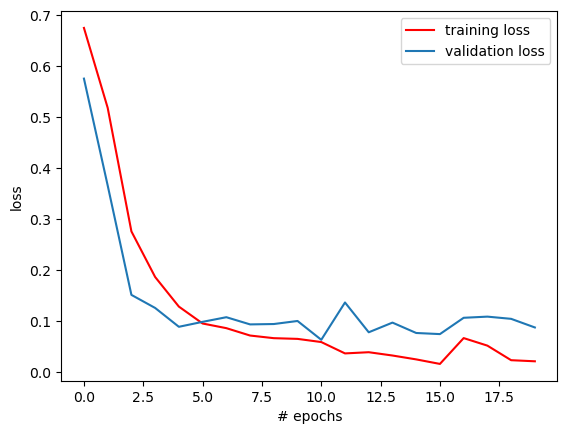

In [5]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

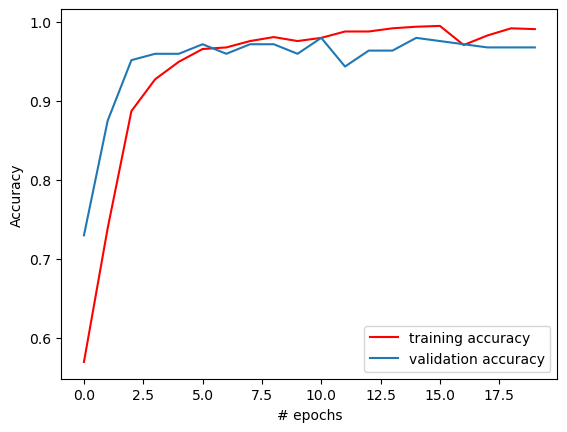

In [6]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [7]:
print(model.evaluate(test_data,test_target))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9732 - loss: 0.1049
[0.1196582093834877, 0.97826087474823]
